# CB AIML - Machine Learning
# Mercedes-Benz Greener Manufacturing

## DESCRIPTION
Reduce the time a Mercedes-Benz spends on the test bench.

## Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:
- If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
- Check for null and unique values for test and train sets.
- Apply label encoder.
- Perform dimensionality reduction.
- Predict your test_df values using XGBoost.

## Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To view plot in Notebook
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data
- Load the train.csv and test.csv files using `pd.read_csv()` to two separate DataFrame
- Look at the first 5 rows of the data using `df.head()`

In [2]:
# Load data file to DataFrame for both train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Show first 2 rows of data in train DataFrame
train.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0


In [3]:
# Show first 2 rows of data in test DataFrame
test.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0


## Explore the Data
Check the size and datatype of the train and test datasets.

In [4]:
print('Dimension of train dataset:', train.shape)
print('Dimension of test dataset:', test.shape)

Dimension of train dataset: (4209, 378)
Dimension of test dataset: (4209, 377)


In [5]:
# Use df.info() to look at the dtype for the data in the DataFrame
print(train.info(memory_usage='deep'))
print()
print(test.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 13.8 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 13.7 MB
None


In [6]:
# Check for categorical features
print('Categorical features [train] column names:', train.select_dtypes(exclude=np.number).columns)
print('Categorical features [test] column names:', test.select_dtypes(exclude=np.number).columns)

Categorical features [train] column names: Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
Categorical features [test] column names: Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


***
##### The train dataset has
- 378 features (8 categorical, 369 (int64) and 1 (float64) numerical)
- and 4209 observations
- The target variable is [`y`] and is of float64 dtypes. This is the time spend on the test bench.
- The input variables range from [`X0`] to [`X385`]
- [`X0`], [`X1`], [`X2`], [`X3`], [`X4`], [`X5`], [`X6`], [`X8`] are the 8 categorical features
- [`X10`] to [`X385`] are the 369 numerical features of int64 dtypes
- Looks like the 368 numerical features in [`X10`] to [`X385`] might only have 0 and 1 values

##### The test dataset has
- 377 features (8 categorical, 369 numerical)
- and 4209 observations
- There is no target variable in this dataset
- The input variables range from [`X0`] to [`X385`]
- [`X0`], [`X1`], [`X2`], [`X3`], [`X4`], [`X5`], [`X6`], [`X8`] are the 8 categorical features
- [`X10`] to [`X385`] are the 369 numerical features of int64 dtypes
- Looks like the 368 numerical features in [`X10`] to [`X385`] might only have 0 and 1 values
***
## EDA (Exploratory Data Analysis)
### Distribution of the target variable
- The requirement for this project is to reduce the time that cars spend on the test bench
- Let's first take a look at the distribution of the target variable (the time spend on the test bench).

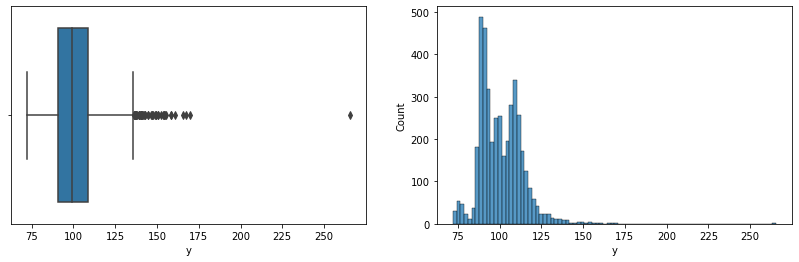

In [7]:
# Visualize the distribution of the target variable, y
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Show the distribution using boxplot and histplot
sns.boxplot(x=train['y'], ax=axes[0])
#sns.distplot(train['y'], hist=True, kde=True, ax=axes[1])
sns.histplot(train['y'], ax=axes[1])

plt.show()

In [8]:
# Show the basic statistical details of the dataset’s distribution
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

---
- The target variable (time a Mercedes-Benz spends on the test bench) shows an almost normal distribution from approximately 72 seconds to 140 seconds.
- However, from the statistical details, the distribution is skewed left with the mean closer to the 75 percentile.
- The boxplot above shows that there are outliers for the target variable from approximately 140 seconds to 265 seconds.
- To reduce the time a Mercedes-Benz spends on the test bench, we should remove the outliers from the dataset when training the model.
---
### Remove outliers from the target variable, y
- Removing the outliers from the target variable is equivalent to removing noises from the dataset when training the model.
- Since only the train dataset has the y target variable and new data used for prediction would not have this variable, this process of removing the outlier will not be build into the pipeline.
- Use `feature_engine.outliers.OutlierTrimmer` to trim (remove) the outliers from the target variale, y.

In [9]:
# OutlierTrimmer() trims the maximum and / or minimum values of a variable
from feature_engine.outliers import OutlierTrimmer

# Use IQR to cap the outliers with both the lower and upper IQR
trimmer = OutlierTrimmer(capping_method='iqr', variables=['y'], tail='both')
trimmer.fit(train)

print("Dimension of ['train'] dataset before trimming:", train.shape)
train = trimmer.transform(train)

print("Dimension of ['train'] dataset after trimming:", train.shape)

Dimension of ['train'] dataset before trimming: (4209, 378)
Dimension of ['train'] dataset after trimming: (4205, 378)



***
- There were 4 outlier observations removed from the [`train`] dataset
***
### Explore the [`ID`] feature
- The [`ID`] feature looks like an ordinal variable
- Check if all the observations are unique values
    - Use `df[col].unique()` to check the possible unique values for the [`ID`] feature
    - Use `df[col].nunique()` to check the number of unique values for the [`ID`] feature

In [10]:
print('Possible unique [\'ID\'] values in the [\'train\'] dataset: ', train['ID'].unique())
print('Number of unique [\'ID\']values in the [\'train\'] dataset: ', train['ID'].nunique())
print()
print('Possible unique [\'ID\'] values in the [\'test\'] dataset: ', test['ID'].unique())
print('Number of unique [\'ID\'] values in the [\'test\'] dataset: ', test['ID'].nunique())

Possible unique ['ID'] values in the ['train'] dataset:  [   0    6    7 ... 8412 8415 8417]
Number of unique ['ID']values in the ['train'] dataset:  4205

Possible unique ['ID'] values in the ['test'] dataset:  [   1    2    3 ... 8413 8414 8416]
Number of unique ['ID'] values in the ['test'] dataset:  4209


***
- It looks like the [`train`] and [`test`] datasets might have been randomly splitted from a single source of data with [`ID`] values starting from 0 to 8417.
- The [`ID`] feature has ordinal values and it has unique values for all 4205 and 4209 observations in the [`train`] and [`test`] datasets respectively.
- This feature (column) can be dropped.
***

### Find variable(s) with variance equal to zero
- Find the column(s) with variance equal to zero
    - Get the Series of booleans which indicates if the columns has variance equal to zero (using `df.var() == 0`)
    - Only numerical features have variance, so get the numeric dtypes columns that have zero variance  
- Drop these column(s) that has zero variance later

In [11]:
# Get the columns with variance equal zero
train_zero_var_col = train.select_dtypes(include=np.number).columns[train.var() == 0]
test_zero_var_col = test.select_dtypes(include=np.number).columns[test.var() == 0]

# Print the result
print(len(train_zero_var_col), 'variables with variance equal to zero in [\'train\']:')
print('Columns are:', train_zero_var_col.to_list())
print()
print(len(test_zero_var_col), 'variables with variance equal to zero in [\'test\']:')
print('Columns are:', test_zero_var_col.to_list())

13 variables with variance equal to zero in ['train']:
Columns are: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']

5 variables with variance equal to zero in ['test']:
Columns are: ['X257', 'X258', 'X295', 'X296', 'X369']


***
- 13 features out of the 369 numerical features in the `train` dataset have zero variance. 
- 5 features of of the 369 numerical features in the `test` dataset have zero variance.
***
### Check for null and unique values for test and train sets.

In [12]:
# Check for null values in the train and test dataset
print('Columns with null values in train dataset:', train.columns[train.isnull().any()])
print('Columns with null values in test dataset:', test.columns[test.isnull().any()])

Columns with null values in train dataset: Index([], dtype='object')
Columns with null values in test dataset: Index([], dtype='object')


***
There are no null values in both the test and train sets.
***
#### Check the number of unique values in the [`train`] and [`test`] datasets
- Use `df.nunique()` to check for number of unique values in the train and test datasets
- Check the list of features that have more than 2 unique values in the [`train`] and [`test`] datasets respectively
- Check the list of features that have 2 unique values in the [`train`] and [`test`] datasets respectively
- Check the list of features with 1 unique value in the [`train`] and [`test`] datasets respectively

In [13]:
# Show the list of features with more than 2 unique values, with only 2 unique values and any with less than 2
print('Train dataset:')
print('Columns with more than 2 unique values:\n', train.columns[train.nunique().values > 2])
print('Columns with only 2 unique values:\n', train.columns[train.nunique().values == 2])
print('Columns with 1 unique value:\n', train.columns[train.nunique().values < 2])

print('\nTest dataset:')
print('Columns with more than 2 unique values:\n',test.columns[test.nunique().values > 2])
print('Columns with only 2 unique values:\n', test.columns[test.nunique().values == 2])
print('Columns with 1 unique value:\n', test.columns[test.nunique().values < 2])

Train dataset:
Columns with more than 2 unique values:
 Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
Columns with only 2 unique values:
 Index(['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=355)
Columns with 1 unique value:
 Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X339', 'X347'],
      dtype='object')

Test dataset:
Columns with more than 2 unique values:
 Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
Columns with only 2 unique values:
 Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=363)
Columns with 1 unique value:
 Index(['X257', 'X258',

***
- [`ID`, `y`, `X0`, `X1`, `X2`, `X3`, `X4`, `X5`, `X6`, `X8`] in [`train`] dataset has more than 2 unique values.
- [`ID`, `X0`, `X1`, `X2`, `X3`, `X4`, `X5`, `X6`, `X8`] in [`test`] dataset has more than 2 unique values.
- Other than the [`ID`] and [`y`], the features with more than 2 unique values are categorical.
- The 13 zero variance features, [`X11`, `X93`, `X107`, `X233`, `X235`, `X268`, `X289`, `X290`, `X293`, `X297`, `X330`, `X339`, `X347`], in the [`train`] dataset have only 1 unique value.
- The 5 zero variance features, [`X257`, `X258`, `X295`, `X296`, `X369`], in the [`test`] dataset have only 1 unique value.
- The remaining features in the [`train`] and [`test`] datasets respectively have are only 2 unique values.
- There are 355 binary unique value columns in the ['train'] dataset.
- There are 363 binary unique value columns in the ['test'] dataset.
***

#### Unique Values for Categorical Variables
- Get the unique values for the features, [`X0`] to [`X8`], for the ['train'] and ['test'] datasets.

In [14]:
# The list of column names for the categrical variables in the train and test datasets
labels = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

# Get unique values for variables X0 to X8 in train dataset
print('Unique values for features [X0] to [X8] in [\'train\'] and [\'test\'] dataset:')
print('_'*112)
for col in labels:
    print(train[col].nunique(), 'unique values for', col, 'in [\'train\']', train[col].unique())
    print('_'* 112)
    
    print(test[col].nunique(), 'unique values for', col, 'in [\'test\']', test[col].unique())
    print('_'* 112)
    
col = 'y'
print(train[col].nunique(), 'unique values for', col, 'in [\'train\']', train[col].unique())

Unique values for features [X0] to [X8] in ['train'] and ['test'] dataset:
________________________________________________________________________________________________________________
47 unique values for X0 in ['train'] ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
________________________________________________________________________________________________________________
49 unique values for X0 in ['test'] ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
________________________________________________________________________________________________________________
27 unique values for X1 in ['train'] ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c'

In [15]:
# Show statistical details for the categorical variables in the train dataset
train.describe(include='O')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4205,4205,4205,4205,4205,4205,4205,4205
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1941,4201,231,1040,277


In [16]:
# Show statistical details for the categorical variables in the test dataset
test.describe(include='O')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


***
- Looks like there might be some unique values that appears in the [`test`] dataset but not in the [`train`] dataset.
***
#### Visualize the Categorical Features against the Target Variable
- Show the boxplot for each of the categorical features

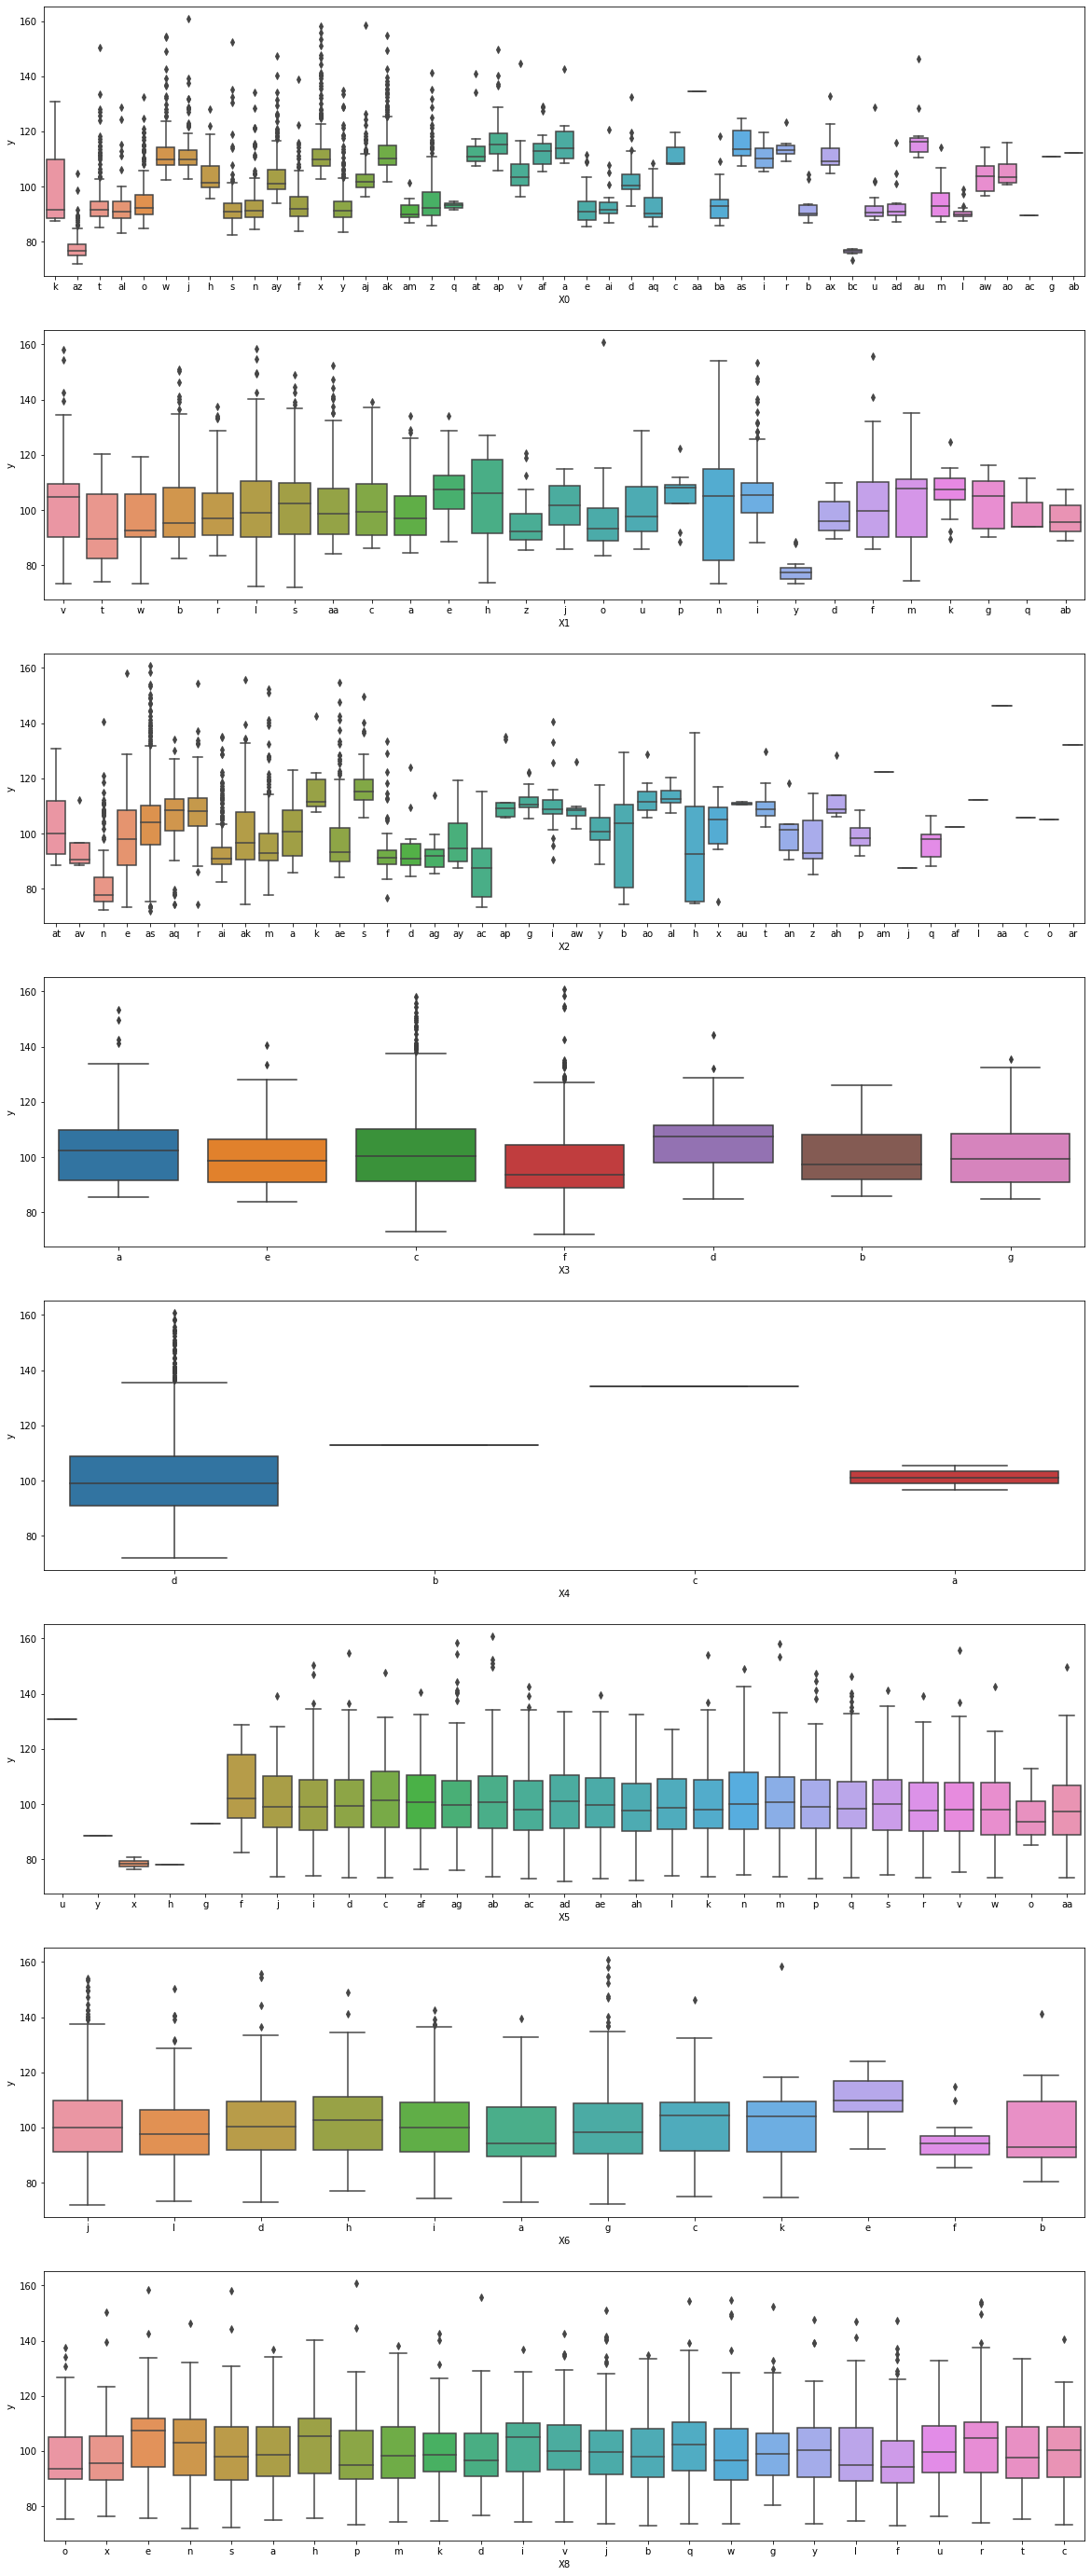

In [17]:
fig, axes = plt.subplots(len(labels), figsize=(20, 50))

for i, col in enumerate(labels):
    sns.boxplot(x=col, y='y', data=train, ax=axes[i])

***
- X0 and X2 have the most variance in its bench testing time
- X1, X3, X5, X6, X8 are more or less consistent in the bench testing time
- X4 has only 4 unique values with the bench testing time within the target variable normal distribution
***

#### Unique Values for Numerical Variables
- First show the unique value with 2 or 1 unique values for some of the features in the [`train`] dataset
- Then show the uniqe value with 2 or 1 unique value for some of the features in the [`test`] dataset

In [18]:
# Print the unique values for some of the numerica features just to see what unique values they have
print('Unique values for numerical features in train dataset')
print('_'*100)
for col in ['X10', 'X12', 'X13', 'X14', 'X15', 'X380', 'X382', 'X383', 'X384', 'X385']:
    print(train[col].nunique(), 'unique values for', col, train[col].unique())
    
for col in ['X11', 'X93', 'X107', 'X233', 'X235']:
    print(train[col].nunique(), 'unique values for', col, train[col].unique())

print('_'*100)
print('Unique values for numerical features in test dataset')
print('_'*100)
for col in ['X28', 'X29', 'X30', 'X31', 'X32', 'X198', 'X199', 'X200', 'X201', 'X202']:
    print(test[col].nunique(), 'unique values for', col, test[col].unique())

for col in ['X257', 'X258', 'X295', 'X296', 'X369']:
    print(test[col].nunique(), 'unique values for', col, test[col].unique())

Unique values for numerical features in train dataset
____________________________________________________________________________________________________
2 unique values for X10 [0 1]
2 unique values for X12 [0 1]
2 unique values for X13 [1 0]
2 unique values for X14 [0 1]
2 unique values for X15 [0 1]
2 unique values for X380 [0 1]
2 unique values for X382 [0 1]
2 unique values for X383 [0 1]
2 unique values for X384 [0 1]
2 unique values for X385 [0 1]
1 unique values for X11 [0]
1 unique values for X93 [0]
1 unique values for X107 [0]
1 unique values for X233 [0]
1 unique values for X235 [0]
____________________________________________________________________________________________________
Unique values for numerical features in test dataset
____________________________________________________________________________________________________
2 unique values for X28 [1 0]
2 unique values for X29 [1 0]
2 unique values for X30 [0 1]
2 unique values for X31 [1 0]
2 unique values for X3

***
- From the `df.describe()` display of statistics, the `min` and `max` value show 0 and 1 respectively for most of the numerical features.
- Some of the numerical features have 0 for both the `min` and `max` values - these are the columns with variance equal to zero.
- It can be confirmed that other than the features with zero variance in [X10] to [X385], these numerical features have 2 unique values, 0 and 1.

In [19]:
# High level statistics for numerical variables - Cardinality
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4205.000000,4205.000000,4205.000000,4205.0,4205.000000,4205.000000,4205.000000,4205.000000,4205.000000,4205.000000,...,4205.000000,4205.000000,4205.000000,4205.00000,4205.000000,4205.000000,4205.000000,4205.000000,4205.000000,4205.000000
mean,4207.196671,100.582392,0.013317,0.0,0.074673,0.057788,0.428537,0.000476,0.002616,0.007610,...,0.319144,0.057313,0.314625,0.02069,0.009512,0.008086,0.007610,0.001665,0.000476,0.001427
std,2437.580961,12.298859,0.114644,0.0,0.262894,0.233371,0.494926,0.021806,0.051085,0.086913,...,0.466200,0.232467,0.464422,0.14236,0.097079,0.089566,0.086913,0.040771,0.021806,0.037751
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2096.000000,90.810000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4221.000000,99.140000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6315.000000,109.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,160.870000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Engineering
- Split the [`train`] dataset into X_train (train) and X_val (validation) datasets for training the model

In [20]:
# Split dataset to train and validation
from sklearn.model_selection import train_test_split

y = train['y']
X = train.drop(columns=['y'])

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [21]:
print(X_train.shape, X_val.shape)

(3153, 377) (1052, 377)


***
- There are 3153 observations in the [`X_train`] dataset
- There are 1052 observations in the [`X_val`] dataset
***
### Apply label encoder.
- It looks like the unique values in the [`train`] and [`test`] datasets might be different in some cases.
- To make sure that all labels are encoded when applying label encoder, compile the full list of unique values for each of the features.
- Train (fit) the categorical labels with the compiled list of unique values for each feature.
- Then apply (transform) the label encoding to the [`X_train`] and [`X_val`] datasets.

In [22]:
# Get the categorical columns from the dataset.
cat_cols = train.select_dtypes(exclude=np.number).columns.to_list()

print('Categorical Features:', cat_cols)
print('Checking to make sure [\'test\'] categorical columns are the same:',
      test.select_dtypes(exclude=np.number).columns.to_list())

Categorical Features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
Checking to make sure ['test'] categorical columns are the same: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [23]:
# Print the categorical value for ['X0'] feature before applying label encoding, to use for verification later
print(X_train['X0'].nunique(), 'unique values for X0 in the [\'X_train\']', X_train['X0'].unique())

45 unique values for X0 in the ['X_train'] ['f' 't' 'ak' 'z' 'af' 'y' 'h' 'j' 'v' 's' 'n' 'x' 'az' 'k' 'ay' 'o' 'aj'
 'w' 'e' 'ap' 'l' 'd' 'al' 'at' 'i' 'ba' 'as' 'au' 'a' 'ax' 'aq' 'b' 'ad'
 'q' 'am' 'u' 'm' 'c' 'ai' 'r' 'aw' 'bc' 'ao' 'g' 'ab']


In [24]:
# Import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

def encodeCategoricalLabel(unique_labels):
    # Initiate the LabelEncoder
    label_encoder = LabelEncoder()
    
    # Train the encoder with the list of unique labels
    label_encoder.fit(unique_labels)
    
    return label_encoder

# Save each label encoder to a dictionary for verification using inverse_transform()
label_encoder_dict = {}

# Process each feature (Categorical columns)
for col in cat_cols: 
    # Combine both unique values list from ['train'] and ['test'] datasets
    unique_labels = list(train[col].unique()) + list(test[col].unique())
    
    # Add encoder for each feature to dictionary after training the encoder
    cat_label_encoder = encodeCategoricalLabel(unique_labels)
    label_encoder_dict[col] = cat_label_encoder
    
    # Transform the categorical labels to numerical values using the LabelEncoder
    X_train[col] = cat_label_encoder.transform(X_train[col])
    X_val[col] = cat_label_encoder.transform(X_val[col])    

In [25]:
# Verify that the Label Encoding had been applied to the Categorical features
for col in cat_cols:
    print(X_train[col].nunique(), 'unique values for', col, 'in [\'train\']', X_train[col].unique())
    print('_'*108)
    print(X_val[col].nunique(), 'unique values for', col, 'in [\'validation\']', X_val[col].unique())
    print('_'*108)

45 unique values for X0 in ['train'] [32 46 10 52  6 51 34 36 48 45 40 50 24 37 23 41  9 49 31 15 38 30 11 18
 35 26 17 19  0 22 16 25  4 43 12 47 39 29  8 44 21 28 14 33  2]
____________________________________________________________________________________________________________
43 unique values for X0 in ['validation'] [46 10 15 23 52  9 41 50 14 26 51 49 45 32 36 38 30 35 22 47 40 24 34  8
  6 11 19 39 16 18 12 21 37 48 31  4 25  0 44 17  1  3 29]
____________________________________________________________________________________________________________
27 unique values for X1 in ['train'] [13  3 24 20 23  1 14 19  0 15 16  4  9 10 26 11  7 22  6  8 21 25 12 17
  2 18  5]
____________________________________________________________________________________________________________
26 unique values for X1 in ['validation'] [ 3 20 13 19  1  9 23  4 10  0  7 26 24 15 25 16  6 21  5 17 14 22 11 12
  8  2]
________________________________________________________________________________

In [26]:
print('Column X0 values:', X_train['X0'].values)

# Verify that the encoding can be transform back to the original values
label_encoder_dict.get('X0').inverse_transform(X_train['X0'])

Column X0 values: [32 46 10 ... 10 46 52]


array(['f', 't', 'ak', ..., 'ak', 't', 'z'], dtype='<U2')

***
- Each column of the categorical features have been transformed using the `sklearn.preprocessing.LabelEncoder`
- Since each of the categorical features have to be encoded separately, I still have not found a way to generalize the process so it could be use in a pipeline.
- This process will be defined in a function to be used for new data before running the pipeline later.
- For now, we transform both the [`train`] and [`test`] dataset with the LabelEncoder here and will not add the process in the pipeline or run it before running the pipeline.
***
#### Visualize the Correlation of the Categorical Features against the Target Variable, y
- Plot a heapmap to show the correlation

<AxesSubplot:>

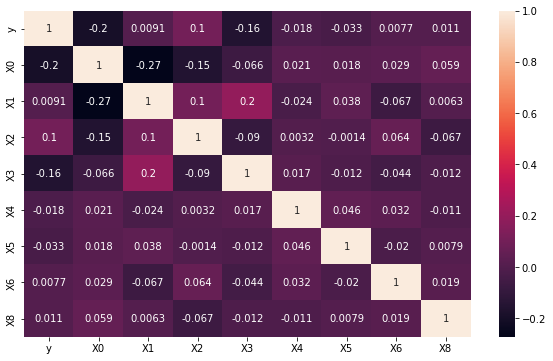

In [27]:
corr_df = X_train[X_train.columns[1:9]]
corr_df.insert(0, 'y', y_train)
corr_matrix = corr_df.corr(method='pearson')

# Display the correlation matrix in a heatmap
plt.figure(figsize= (10,6))
sns.heatmap(corr_matrix, annot=True)

***
- It looks like there are no obvious correlations between the categorical features and the target variable, y.
***
#### Deal with Outliers
- Use `feature_engine.outliers.Winsorizer` to cap outliers for the categorical features in the dataset using IQR capping method

In [28]:
# Winsorizer() caps maximum and / or minimum values of a variable

from feature_engine.outliers import Winsorizer

print('Dealing with outlier for the categorical features:', cat_cols)

capper = Winsorizer(capping_method='iqr', tail='both', variables=cat_cols)

capper.fit(X_train)
X_train_cap = capper.transform(X_train)
X_val_cap = capper.transform(X_val)

Dealing with outlier for the categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


***
## Feature Selection
#### Drop [`ID`]
- Use `feature_engine.selection.DropFeatures` to drop the ordinal [`ID`] variable

In [29]:
from feature_engine.selection import DropFeatures

drop_sel = DropFeatures('ID')
drop_sel.fit(X_train_cap)

X_train_df = drop_sel.transform(X_train_cap)
X_val_df = drop_sel.transform(X_val_cap)

X_train_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1595,32.0,13.0,5.0,5.0,3.0,4.0,6.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,46.0,3.0,48.0,3.0,3.0,11.0,9.0,15.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3244,10.0,24.0,11.0,2.0,3.0,25.0,6.0,1.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1283,52.0,3.0,9.0,2.0,3.0,3.0,9.0,16.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4055,6.0,20.0,19.0,3.0,3.0,29.0,8.0,16.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
print('Columns with 1 unique value:\n', len(list(X_train_df.columns[X_train_df.nunique().values < 2])))
print('Columns with 1 unique value:\n', len(list(X_val_df.columns[X_val_df.nunique().values < 2])))

Columns with 1 unique value:
 19
Columns with 1 unique value:
 41


***
### Remove variable(s) with variance equal to zero
- Use the VarianceThreshold in sklearn.feature_selection to remove the columns with zero variance

In [31]:
# Use sklearn.feature_selection.VarianceThreshold to remove zero variance
from sklearn.feature_selection import VarianceThreshold
from feature_engine.wrappers import SklearnTransformerWrapper

vt_selector = SklearnTransformerWrapper(transformer = VarianceThreshold())
vt_selector.fit(X_train_df)

X_train_var = vt_selector.transform(X_train_df)
X_val_var = vt_selector.transform(X_val_df)

print('X_train dimension before and after removing zero variance:', X_train_df.shape, X_train_var.shape)
print('X_train dimension before and after removing zero variance:', X_val_df.shape, X_val_var.shape)

X_train dimension before and after removing zero variance: (3153, 376) (3153, 357)
X_train dimension before and after removing zero variance: (1052, 376) (1052, 357)


***
- 19 features with zero variance had been removed from the [`X_train`] dataset
- Although the [`X_val`] dataset have 41 features wtih zero variance, only 19 of the features trained (fit) with the [`X_train`] dataset had been removed from the [`X_val`] dataset
***
### Remove Duplicates Features from the Datasets
- Use `feature_engine.selection.DropDuplicateFeatures` to remove any duplicates from the datasets

In [32]:
from feature_engine.selection import DropDuplicateFeatures

duplicates = DropDuplicateFeatures()
duplicates.fit(X_train_var)

print(len(duplicates.features_to_drop_), 'duplicate features to drop')
print(duplicates.features_to_drop_)

X_train_dup = duplicates.transform(X_train_var)
X_val_dup = duplicates.transform(X_val_var)

print('X_train:', X_train_dup.shape, X_train_var.shape, 'X_val:', X_val_dup.shape, X_val_var.shape)

52 duplicate features to drop
{'X248', 'X147', 'X260', 'X324', 'X84', 'X199', 'X94', 'X226', 'X227', 'X217', 'X254', 'X239', 'X296', 'X364', 'X213', 'X320', 'X102', 'X245', 'X244', 'X249', 'X266', 'X35', 'X382', 'X279', 'X129', 'X172', 'X302', 'X253', 'X216', 'X247', 'X365', 'X37', 'X326', 'X39', 'X243', 'X119', 'X360', 'X214', 'X122', 'X134', 'X242', 'X222', 'X263', 'X299', 'X232', 'X385', 'X90', 'X146', 'X113', 'X76', 'X262', 'X54'}
X_train: (3153, 305) (3153, 357) X_val: (1052, 305) (1052, 357)


***
- 52 duplicated features to be dropped from the datasets
- After dropping the duplicated features, [`X_train`] has 305 features remaining.
- Similarly, since the model was trained with the [`X_train`] dataset, the 52 duplicated features were also dropped from the [`X_val`] dataset
***
### Scale the data before applying PCA Dimensionality Reduction
- Use sklearn.preprocessing.StandardScaler to standardize features by removing the mean and scaling to unit variance.

In [33]:
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper

scaler = SklearnTransformerWrapper(transformer = StandardScaler())
scaler.fit(X_train_dup)
X_train_scaled = scaler.transform(X_train_dup)
X_val_scaled = scaler.transform(X_val_dup)

X_train_scaled.head()

,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
1595,-0.163426,0.219915,-1.321551,1.220125,-1.270507,-0.271866,-0.926364,-0.116192,-0.288973,-0.253936,...,-0.142788,1.861721,-0.681020,-0.243146,-0.685514,-0.14394,-0.104408,-0.092937,-0.043664,-0.025194
424,0.761322,-0.956321,2.352092,0.066413,-0.476247,0.753486,0.489931,-0.116192,-0.288973,-0.253936,...,-0.142788,-0.537137,-0.681020,-0.243146,-0.685514,-0.14394,-0.104408,10.760008,-0.043664,-0.025194
3244,-1.616602,1.513773,-0.808950,-0.510444,1.112274,-0.271866,-1.492882,-0.116192,3.460536,-0.253936,...,-0.142788,-0.537137,1.468386,-0.243146,-0.685514,-0.14394,-0.104408,-0.092937,-0.043664,-0.025194
1283,1.157643,-0.956321,-0.979817,-0.510444,-1.383972,0.753486,0.631561,-0.116192,-0.288973,-0.253936,...,-0.142788,-0.537137,-0.681020,-0.243146,1.458758,-0.14394,-0.104408,-0.092937,-0.043664,-0.025194
4055,-1.880816,1.043279,-0.125481,0.066413,1.566136,0.411702,0.631561,-0.116192,-0.288973,-0.253936,...,-0.142788,-0.537137,1.468386,-0.243146,-0.685514,-0.14394,-0.104408,-0.092937,-0.043664,-0.025194


### Perform Dimensionality Reduction.
- Use `sklearn.decompositio.PCA` to perform dimensionality reduction

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)

df_train_reduced = pca.transform(X_train_scaled)
df_val_reduced = pca.transform(X_val_scaled)

There are 144 features remaining after performing PCA



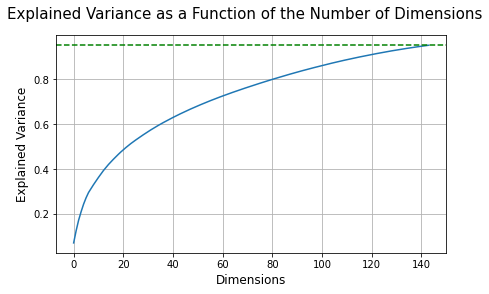

In [35]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('There are', d, 'features remaining after performing PCA\n')

# Plot the graph to show the 'Explained Variance as a Function of the Number of Dimension'
fig, axes = plt.subplots(figsize=(7, 4))
axes.plot(cumsum)
axes.axhline(y=0.95, linestyle='--', color='green')
fig.suptitle('Explained Variance as a Function of the Number of Dimensions', fontsize=15)
axes.set_xlabel('Dimensions', fontsize=12)
axes.set_ylabel('Explained Variance', fontsize=12)
axes.grid()

***
- PCA dimensionality reduction reduces the features from 305 to 144
***

## Train the datasets with XGBoost
- Use `xgboost.XGBRegressor` to train the [`X_train`] data

In [36]:
#!pip install xgboost

In [37]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(df_train_reduced, y_train)
y_pred = xgb_reg.predict(df_val_reduced)
y_pred

array([ 88.577995, 123.06039 , 119.99813 , ...,  79.47509 , 102.67846 ,
        99.411255], dtype=float32)

In [38]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print('RMSE:', rmse, '| R2 Score:', r2)

RMSE: 9.302950562448684 | R2 Score: 0.38834029142929394


***
- r2 score for XGBoost using the default parameters showed that only 39% of observations can be explained by the model
- To improve on the performance of the model, perform parameter tuning to find the best parameters to use with the model 
***
### Parameter Tuning
- Use `sklearn.model_selection.GridSearchCV` to find the best parameters that could improve the r2 score
- After conducting several trial-and-error, below shows the parameters used for tuning

In [39]:
from sklearn.model_selection import GridSearchCV, KFold

#Hyper Parameter Tunnig 
parameters = {
    'learning_rate': [0.015, 0.02],
    'n_estimators': [750, 800],
    'max_depth': [3, 4]
}

gscv = GridSearchCV(estimator=xgb_reg, param_grid=parameters, 
                    scoring='r2', verbose=0, n_jobs=5)

gridsearch_result = gscv.fit(df_train_reduced, y_train)
print('Best Params: ', gridsearch_result.best_params_)

Best Params:  {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 750}


In [40]:
gscvr = pd.DataFrame(gridsearch_result.cv_results_)
for i in range(gscvr.shape[0]):
    print(gscvr.loc[i,'params'], gscvr.loc[i,'mean_test_score'])   

{'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 750} 0.5218442481719944
{'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 800} 0.5219689599391061
{'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 750} 0.5159695413500537
{'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 800} 0.5154720246772373
{'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 750} 0.5237534214676154
{'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 800} 0.5234031664899828
{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 750} 0.5145345887672141
{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 800} 0.5131204409484384


***
- The best parameter from the `GridSearchCV` is: {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 750}
- This best parameter show that 52.37% (0.5237534214676154) of the observations can be explained by the model   
***

## Predict your test_df values using XGBoost.
- Perform feature engineering to encode categorical features in the [`test`] dataset
- Perform feature selection to deal with outliers, zero variance, duplicates and scale to perform PCA (dimensionality reduction) using the predefined pipeline.
- Create a `xgboost.XGBRegressor` with the `best_params_` result from the `GridSearchCV`.
- Run the validation test again to check for improvement in performance
- Predict test_df values using the new XGBoost model

In [41]:
# Import make_pipeline
from sklearn.pipeline import make_pipeline

# Use LabelEncoder to encode the categorical features in test
for col in cat_cols:
    # Get the LabelEncoder trained with the ['X_train'] data from the previously saved dictionary
    label_encoder = label_encoder_dict.get(col)

    test[col] = label_encoder.transform(test[col]) 

# Define pipeline steps
transformer_pipe = make_pipeline(capper,
                                 drop_sel,
                                 vt_selector,
                                 duplicates,
                                 scaler,
                                 pca
                                 )

# Perform feature engineering an selection on ['test'] data
test_df = transformer_pipe.transform(test)
test_df.shape

(4209, 144)

***
#### Create the new XGBoost model with Best Parameters
- Use `xgboost.XGBRegressor` with the best parameters found from `GridSearchCV` to setup new XGBoost model
- The best parameters used is: {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 750}
- Check for improvement in the `RMSE` and `R2 Score`

In [42]:
# Create a new XGBoost model
xgb = XGBRegressor(n_estimators=750, learning_rate=0.02, max_depth=3)

# Train and predict the X_val data again
xgb.fit(df_train_reduced, y_train)
y_pred = xgb.predict(df_val_reduced)

# Check for improvement with RMSE and R2 Score
rmse = sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print('RMSE:', rmse, '| R2 Score:', r2)

RMSE: 8.1073326672532 | R2 Score: 0.53545858886518


***
- The root-mean-square error (RMSE) is: 8.1073326672532
- The r-squared (R2) score is: 0.53545858886518
- This shows an improvement on the model from 0.38834029142929394 to 0.53545858886518 in the [`r2_score`]
***
### Predict test_df values using the new XGBoost Model
- Use the new XGBoost model to predict the values in the [`test`] dataset
- Save the predictions for the [`test`] data to a DataFrame for display

In [43]:
# Perform predictions on the [`test`] data using the new XGBoost model
test_df_pred = xgb.predict(test_df)
test_df_pred

array([ 97.55421 , 104.367035,  96.88539 , ...,  90.99992 , 106.9379  ,
        94.249054], dtype=float32)

In [44]:
# Save prediction into a DataFrame for display
test_predictions = pd.DataFrame()
test_predictions['y'] = test_df_pred

# Show the first 10 results of the prediction
test_predictions.head(10)

,y
0,97.554207
1,104.367035
2,96.885391
3,82.861115
4,109.250046
5,91.567055
6,105.499527
7,94.531654
8,116.082001
9,90.784874


*********************************************************
<p style="text-align: center;">End of Project</p>